# Task 4: Logistic Regression - Binary Classification

 ## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


## Load the Dataset

In [14]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Train/Test Split and Standardize

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Logistic Regression Model

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

## Evaluate Model: Confusion Matrix, Precision, Recall, ROC-AUC

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



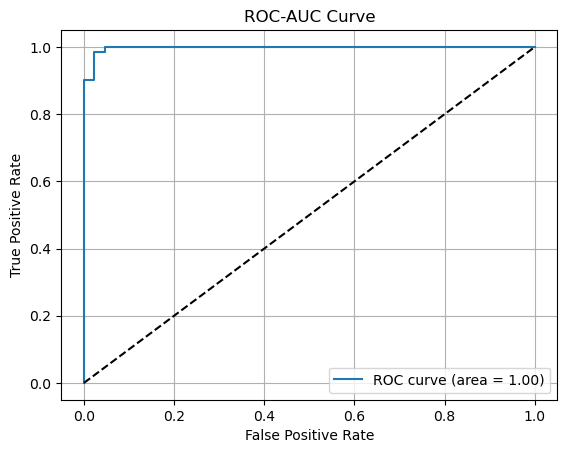

In [22]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (includes precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Tune Threshold & Explain Sigmoid

### Logistic Regression uses the sigmoid function:
#### σ(z) = 1 / (1 + e^(-z))


In [28]:
threshold = 0.4  # default is 0.5
y_custom_pred = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test, y_custom_pred))


[[41  2]
 [ 0 71]]


## Summary

Loaded and explored the breast cancer dataset.

Split data into training and testing sets (80-20 split).

Standardized features using StandardScaler for better model convergence.

Trained a Logistic Regression model on the training set.

Predicted the test set and evaluated results using:

Confusion Matrix

Precision, Recall, F1-score

ROC Curve and AUC score

Visualized the ROC-AUC curve to assess classification performance.

Explained and tested threshold tuning to understand sigmoid output and classification decisions.